#Đề tài: phân tích dữ liệu doanh thu của các loại trò chơi điện tử phổ biến trên thế giới

Mục tiêu: Mục tiêu chính của đề tài là giúp hiểu rõ hiệu suất kinh doanh của các trò chơi điện tử trên toàn cầu, xác định những thể loại game phổ biến, nền tảng bán chạy, nhà phát hành dẫn đầu và xu hướng doanh thu theo khu vực. Thông qua việc phân tích và trực quan hóa dữ liệu, đề tài hỗ trợ việc đánh giá thị trường, nhận diện các dòng game chủ lực cũng như khu vực tiêu thụ tiềm năng để đề xuất chiến lược phát hành phù hợp.

Đối tượng nghiên cứu là bộ dữ liệu “vgsales.csv” công khai trên Kaggle "https://www.kaggle.com/datasets/anandshaw2001/video-game-sales" chứa thông tin về các trò chơi điện tử được phát hành, bao gồm:

Name: tên game

Platform: nền tảng

Year: năm phát hành

Genre: thể loại

Publisher: nhà phát hành

NA_Sales: doanh số bán hàng khu vực Bắc Mỹ

EU_Sales: doanh số bán hàng khu vực Châu Âu

JP_Sales: doanh số bán hàng khu vực Nhật Bản

Other_Sales: doanh số bán hàng các khu vực khác

Global_Sales: doanh số bán hàng toàn cầu

Báo cáo phân tích chi tiết thị trường trò chơi điện tử, rút ra những xu hướng nổi bật, thị hiếu theo từng khu vực và giai đoạn phát triển của ngành game. Đồng thời đề xuất một số định hướng kinh doanh trong ngành game như: ưu tiên phát triển game trên nền tảng có doanh số cao, tập trung vào thể loại thịnh hành tại các khu vực có tiềm năng, hoặc định hướng phát hành theo chu kỳ thời gian có doanh thu vượt trội.

# Tiền xử lý dữ liệu

## Khai báo thư viện và dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

In [9]:
# Cài font hỗ trợ tiếng Việt cho biểu đồ
plt.rcParams['font.family'] = 'DejaVu Sans'

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Thiết lập kiểu hiển thị cho biểu đồ
plt.style.use('seaborn-v0_8')  # Sửa từ 'seaborn' thành 'seaborn-v0_8'
sns.set_palette('muted')

In [4]:
from google.colab import files

# Tải file lên từ máy của bạn
uploaded = files.upload()


Saving vgsales.csv to vgsales.csv


In [5]:
# 1. Đọc và làm sạch dữ liệu
df = pd.read_csv('vgsales.csv')
df_copy=df.copy()  # Tạo bản sao dữ liệu
df.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Tìm hiểu và xử lý dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# Kiểm tra các giá trị không hợp lệ
df_copy.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [6]:
# xử lý giá trị không hợp lệ
print("Kích thước dữ liệu ban đầu:", df_copy.shape)
df=df.dropna()
print("Kích thước dữ liệu sau khi xử lý:", df.shape)
df.isnull().sum()

Kích thước dữ liệu ban đầu: (16598, 11)
Kích thước dữ liệu sau khi xử lý: (16291, 11)


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# Trực quan hóa dữ liệu

## Xét phạm vi toàn cầu

In [7]:
# Top 10 trò chơi bán chạy nhất mọi thời đại dựa trên doanh số bán hàng toàn cầu
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)
top_10_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


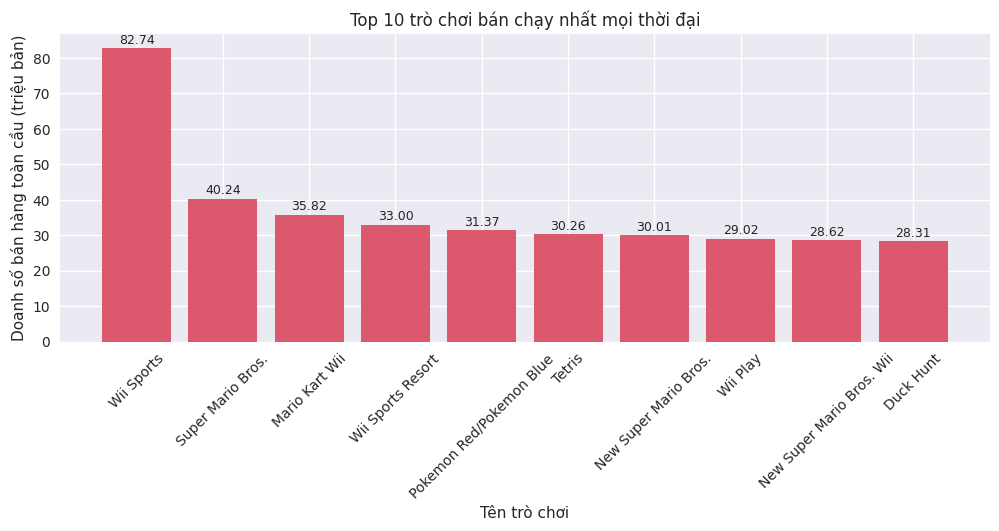

In [10]:
# Biểu đồ trực quan top 10 trò chơi bán chạy nhất mọi thời đại dựa trên doanh số bán hàng toàn cầu
plt.figure(figsize=(12, 4))
bars=plt.bar(top_10_games['Name'], top_10_games['Global_Sales'], color='#dc586d')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9)
plt.xlabel('Tên trò chơi')
plt.ylabel('Doanh số bán hàng toàn cầu (triệu bản)')
plt.title('Top 10 trò chơi bán chạy nhất mọi thời đại')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Tổng doanh số bán hàng toàn cầu theo nền tảng
platform_sales = df.groupby('Platform').agg(
    Total_Games=('Name', 'count'),
    Global_Sales=('Global_Sales', 'sum')
).reset_index()

# Xếp theo tổng doanh số giảm dần
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False).reset_index(drop=True)

platform_sales

,Platform,Total_Games,Global_Sales
0,PS2,2127,1233.46
1,X360,1234,969.60
2,PS3,1304,949.35
3,Wii,1290,909.81
4,DS,2131,818.91
5,PS,1189,727.39
6,GBA,786,305.62
7,PSP,1197,291.71
8,PS4,336,278.10
9,PC,938,254.70


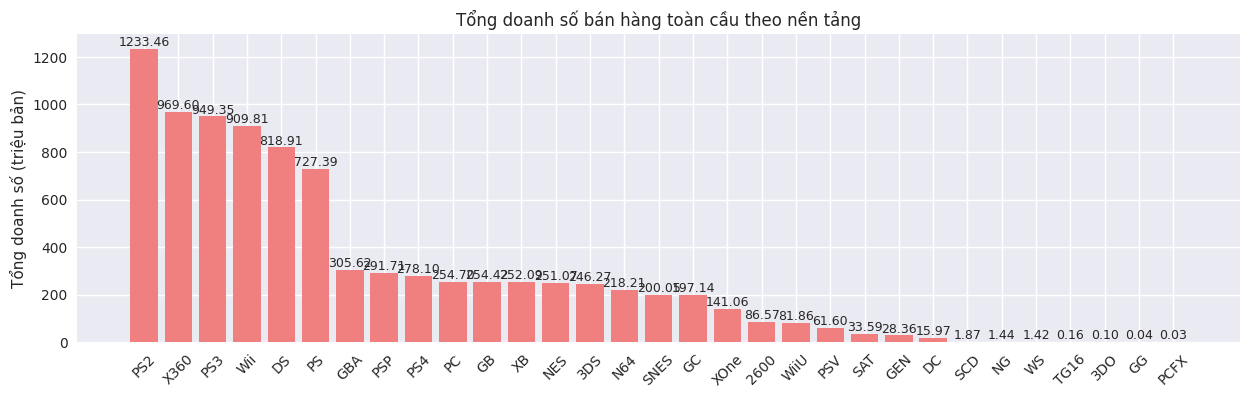

In [12]:
# Biểu đồ trực quan tổng doanh số bán hàng toàn cầu theo nền tảng
plt.figure(figsize=(15, 4))
# Use platform_sales.index to get the platform names
bars=plt.bar(platform_sales['Platform'],platform_sales['Global_Sales'],color='lightcoral')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9)
plt.ylabel('Tổng doanh số (triệu bản)')
plt.title('Tổng doanh số bán hàng toàn cầu theo nền tảng')
plt.xticks(rotation=45)
plt.show()

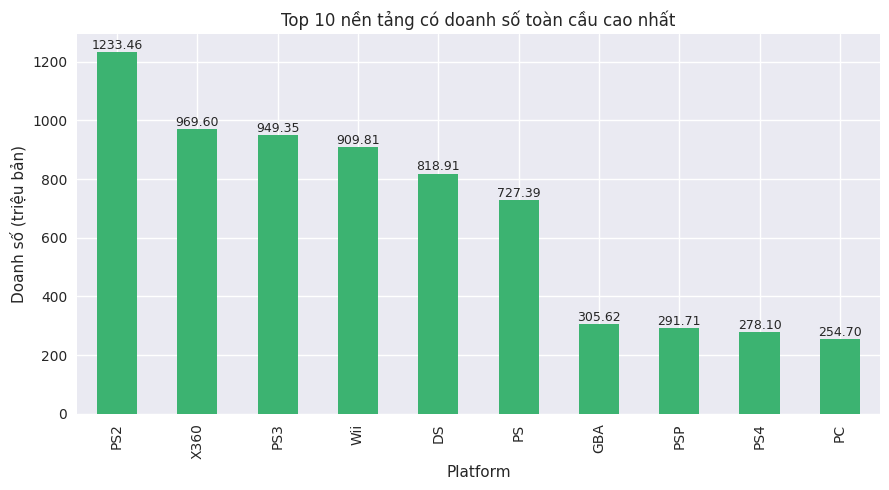

In [13]:
# Top 10 nền tảng có tổng doanh số cao nhất
platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
ax=platform_sales.plot(kind="bar", figsize=(9, 5), color="mediumseagreen")
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9)
plt.title("Top 10 nền tảng có doanh số toàn cầu cao nhất")
plt.ylabel("Doanh số (triệu bản)")
plt.tight_layout()
plt.show()

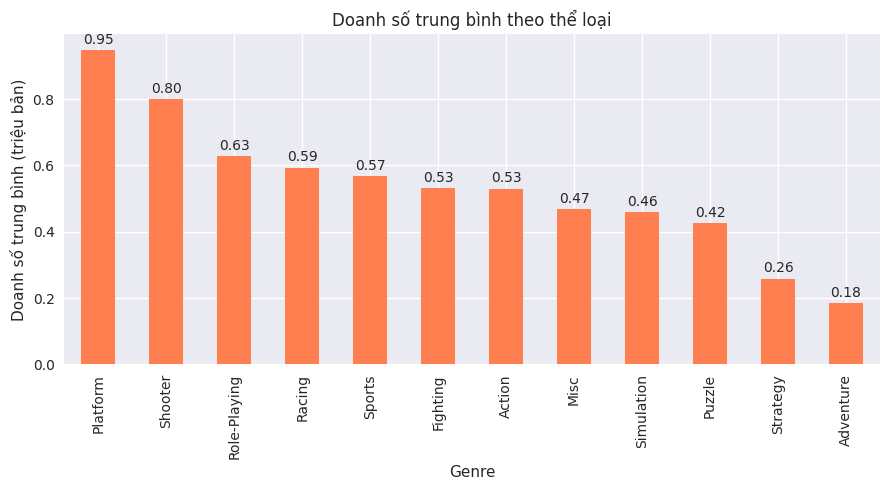

In [14]:
# Doanh số trung bình theo thể loại (Genre)
genre_avg = df.groupby("Genre")["Global_Sales"].mean().sort_values(ascending=False)
ax=genre_avg.plot(kind="bar", figsize=(9, 5), color="coral")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title("Doanh số trung bình theo thể loại")
plt.ylabel("Doanh số trung bình (triệu bản)")
plt.tight_layout()
plt.show()

In [15]:
# Mức độ phổ biến thể loại trò chơi điện tử xét theo doanh số bán hàng toàn cầu
Genre_Popularity = df.groupby('Genre').agg(
    Total_Games=('Name', 'count'),
    Global_Sales=('Global_Sales', 'sum')
).reset_index()

# Xếp theo tổng doanh số giảm dần
Genre_Popularity = Genre_Popularity.sort_values(by='Global_Sales', ascending=False).reset_index(drop=True)
Genre_Popularity

,Genre,Total_Games,Global_Sales
0,Action,3251,1722.84
1,Sports,2304,1309.24
2,Shooter,1282,1026.20
3,Role-Playing,1470,923.83
4,Platform,875,829.13
5,Misc,1686,789.87
6,Racing,1225,726.76
7,Fighting,836,444.05
8,Simulation,848,389.98
9,Puzzle,570,242.21


In [16]:
import plotly.express as px
# Biểu đồ trực quan mức độ phổ biến thể loại trò chơi điện tử xét theo doanh số bán hàng toàn cầu

fig = px.pie(Genre_Popularity, names=Genre_Popularity['Genre'], values=Genre_Popularity['Global_Sales'],
             title='Thể loại phổ biến dựa trên doanh số bán hàng toàn cầu',
             hole=0,
             )

fig.update_traces(textinfo='percent+label', pull=[0.05]*len(Genre_Popularity['Genre']))
fig.show()

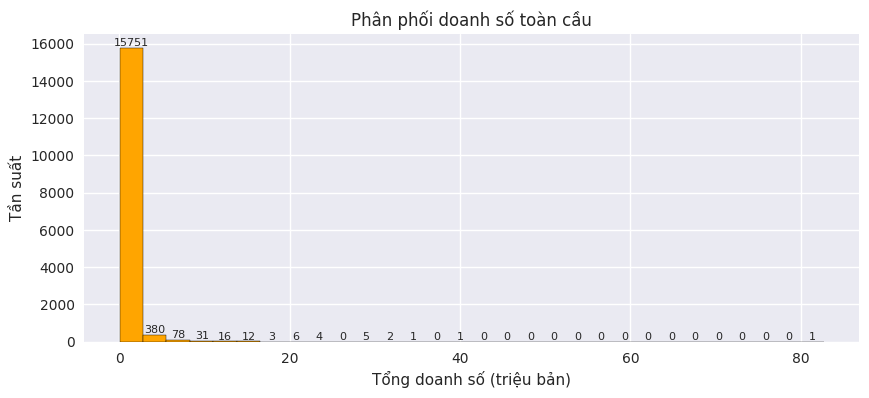

In [17]:
# Phân phối doanh số toàn cầu của các trò chơi
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(df['Global_Sales'], bins=30, color='orange', edgecolor='black')

# Thêm số liệu vào từng cột
for count, patch in zip(n, patches):
    plt.text(patch.get_x() + patch.get_width()/2, count + 0.2, f'{count:.0f}',
             ha='center', va='bottom', fontsize=8)

plt.xlabel('Tổng doanh số (triệu bản)')
plt.ylabel('Tần suất')
plt.title('Phân phối doanh số toàn cầu')
plt.show()


In [18]:
# Top 10 tổng doanh số theo nhà phát hành cao nhất
publisher_sales = df.groupby('Publisher').agg(
    Total_Games=('Name', 'count'),
    Global_Sales=('Global_Sales', 'sum')
).reset_index()

# Xếp theo tổng doanh số giảm dần
publisher_sales = publisher_sales.sort_values(by='Global_Sales', ascending=False).reset_index(drop=True).head(10)
publisher_sales

,Publisher,Total_Games,Global_Sales
0,Nintendo,696,1784.43
1,Electronic Arts,1339,1093.39
2,Activision,966,721.41
3,Sony Computer Entertainment,682,607.28
4,Ubisoft,918,473.54
5,Take-Two Interactive,412,399.30
6,THQ,712,340.44
7,Konami Digital Entertainment,823,278.56
8,Sega,632,270.70
9,Namco Bandai Games,928,253.65


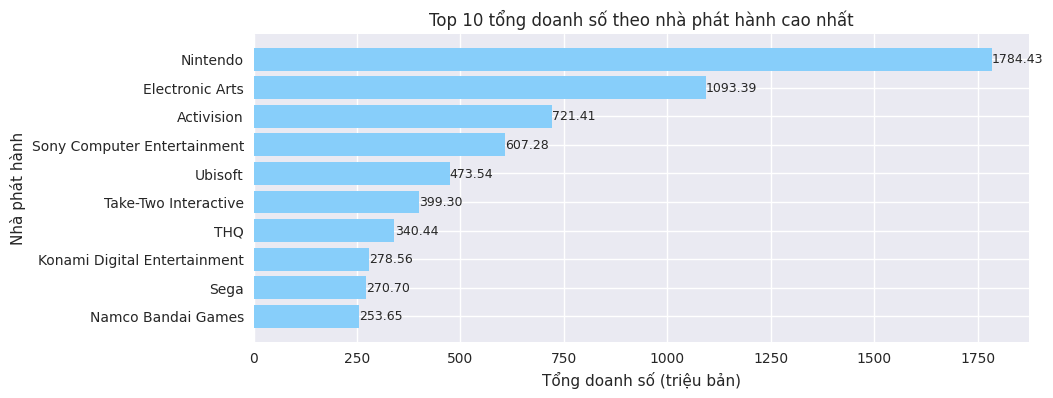

In [19]:
# Biểu đồ trực quan top 10 tổng doanh số theo nhà phát hành cao nhất
publisher_sales1 = publisher_sales.sort_values(by='Global_Sales', ascending=True).reset_index(drop=True).head(10)
plt.figure(figsize=(10, 4))
bars = plt.barh(publisher_sales1['Publisher'], publisher_sales1['Global_Sales'],color='lightskyblue')
# Thêm số liệu vào đầu mỗi thanh
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             va='center', fontsize=9)

plt.xlabel('Tổng doanh số (triệu bản)')
plt.ylabel('Nhà phát hành')
plt.title('Top 10 tổng doanh số theo nhà phát hành cao nhất')
plt.show()

In [20]:
# Xu hướng doanh số bán hàng hằng năm
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
yearly_sales

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


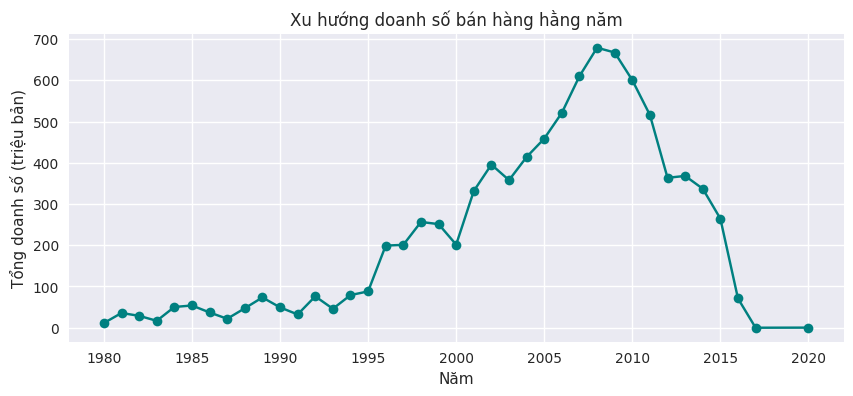

In [21]:
# Biểu đồ trực quan xu hướng doanh số bán hàng hằng năm
plt.figure(figsize=(10, 4))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='teal')
plt.xlabel('Năm')
plt.ylabel('Tổng doanh số (triệu bản)')
plt.title('Xu hướng doanh số bán hàng hằng năm')
plt.grid(True)
plt.show()

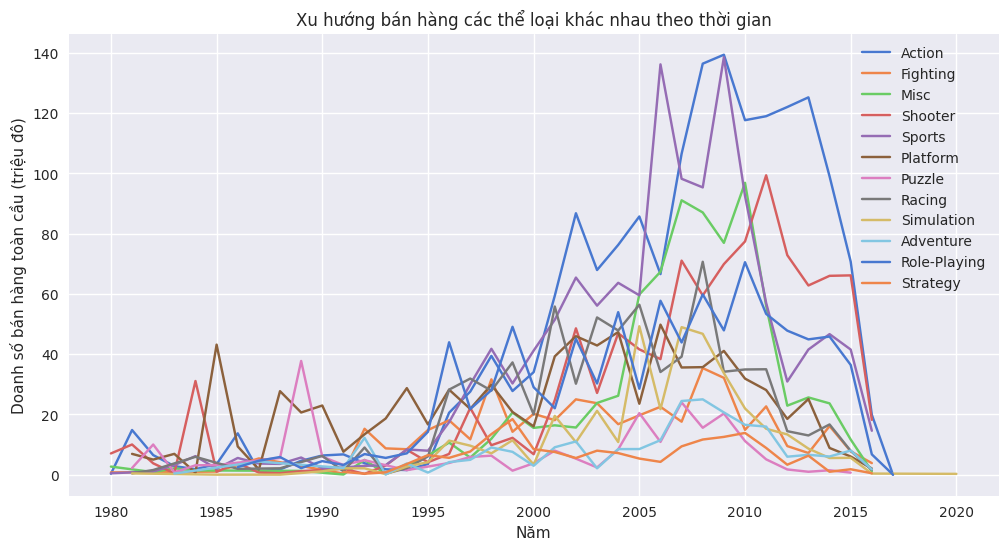

In [22]:
# Nhóm dữ liệu theo năm, thể loại và tổng doanh số
yearly_genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Biểu đồ đường trực quan hóa xu hướng bán hàng theo năm cho từng thể loại
plt.figure(figsize=(12, 6))
for genre in yearly_genre_sales['Genre'].unique():
  genre_sales = yearly_genre_sales[yearly_genre_sales['Genre'] == genre]
  plt.plot(genre_sales['Year'], genre_sales['Global_Sales'], label=genre)

plt.xlabel('Năm')
plt.ylabel('Doanh số bán hàng toàn cầu (triệu đô)')
plt.title('Xu hướng bán hàng các thể loại khác nhau theo thời gian')
plt.legend()
plt.show()

In [23]:
# Thể loại phổ biến nhất trên các nền tảng cụ thể
platform_genre_sales=df.groupby(['Platform','Genre'])['Global_Sales'].sum().reset_index()
# Với mỗi Platform, lấy Genre có Global_Sales cao nhất
top_genre_per_platform = platform_genre_sales.loc[
    platform_genre_sales.groupby('Platform')['Global_Sales'].idxmax()].reset_index(drop=True)
# Xem kết quả
top_genre_per_platform

,Platform,Genre,Global_Sales
0,2600,Action,26.39
1,3DO,Adventure,0.06
2,3DS,Role-Playing,75.71
3,DC,Sports,3.66
4,DS,Misc,137.67
5,GB,Role-Playing,88.24
6,GBA,Platform,78.08
7,GC,Action,37.25
8,GEN,Platform,15.45
9,GG,Platform,0.04


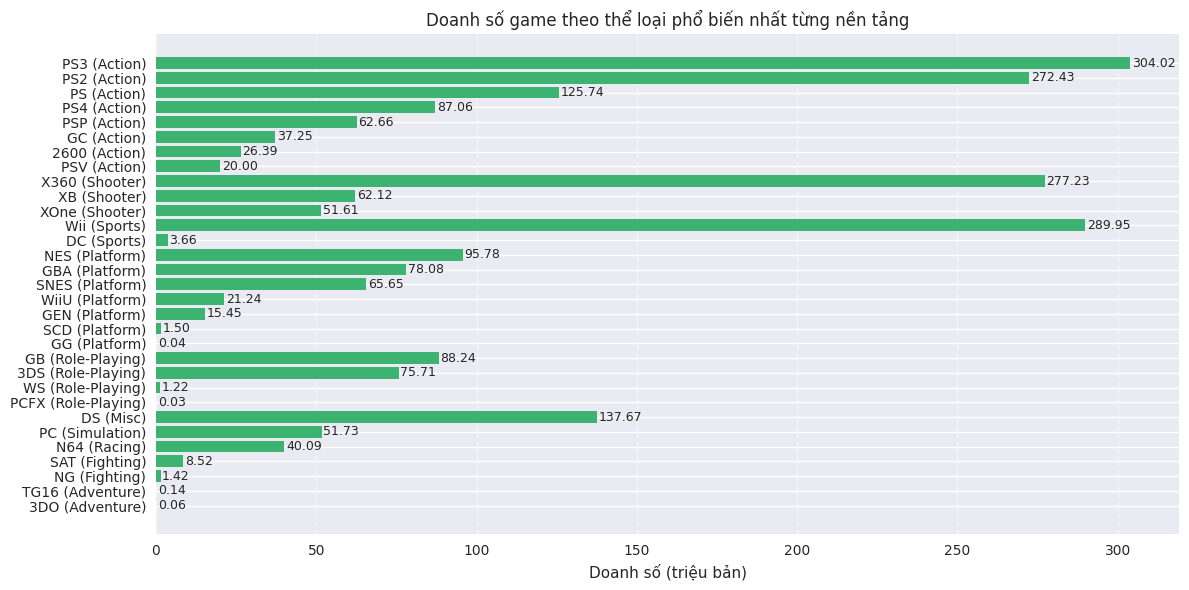

In [24]:
# Biểu đồ trực quan thể loại phổ biến nhất trên các nền tảng cụ thể
# Tính tổng doanh số mỗi thể loại
genre_total_sales = top_genre_per_platform.groupby('Genre')['Global_Sales'].sum().reset_index()

# Merge để thêm cột tổng doanh số thể loại vào bảng top_genre_per_platform
merged_df = pd.merge(top_genre_per_platform, genre_total_sales, on='Genre', suffixes=('', '_Genre_Total'))

# Sắp xếp theo tổng doanh số thể loại tăng dần, sau đó theo Global_Sales platform tăng dần
sorted_df = merged_df.sort_values(
    by=['Global_Sales_Genre_Total', 'Global_Sales'],
    ascending=[True, True]
)

platforms = sorted_df['Platform'] + ' (' + sorted_df['Genre'] + ')'
sales = sorted_df['Global_Sales']

# Vẽ biểu đồ bar ngang
plt.figure(figsize=(12, 6))
bars = plt.barh(platforms, sales, color='mediumseagreen')

for bar, value in zip(bars, sales):
    plt.text(value + 0.5, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', fontsize=9)

plt.xlabel('Doanh số (triệu bản)')
plt.title('Doanh số game theo thể loại phổ biến nhất từng nền tảng')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Xét phạm vi khu vực

In [25]:
# Doanh số theo khu vực
region_sales=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_sales

,0
NA_Sales,4327.65
EU_Sales,2406.69
JP_Sales,1284.27
Other_Sales,788.91


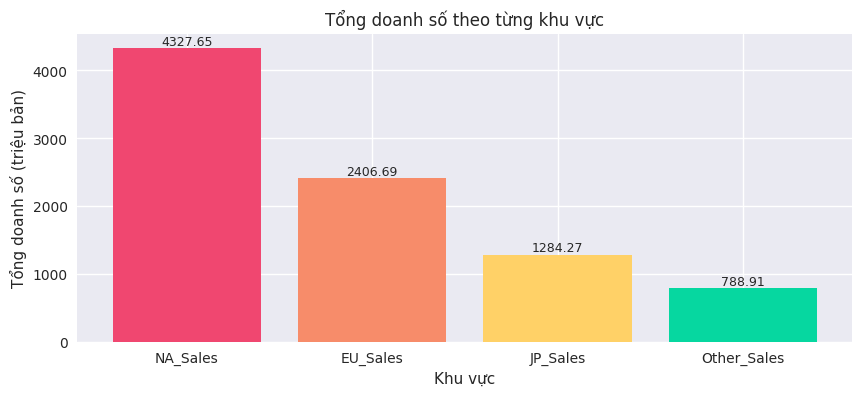

In [26]:
# Biểu đồ trực quan doanh số theo khu vực
plt.figure(figsize=(10, 4))
barss=plt.bar(region_sales.index, region_sales.values, color=['#f04770','#f78c6a', '#ffd167', '#06d7a0'])
# Thêm giá trị vào từng cột
for bar in barss:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9)
plt.xlabel('Khu vực')
plt.ylabel('Tổng doanh số (triệu bản)')
plt.title('Tổng doanh số theo từng khu vực')
plt.show()

In [27]:
# Tính tổng doanh số từng khu vực
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Tính tổng doanh số toàn cầu
global_sales = df['Global_Sales'].sum()

# Tính tỷ lệ từng khu vực
region_sales_ratio = (region_sales / global_sales)*100

# Xếp theo tỷ lệ giảm dần
region_sales_ratio = region_sales_ratio.sort_values( ascending=True)
region_sales_ratio

# Xem kết quả
print("Tỷ lệ đóng góp doanh số của từng khu vực\n",round(region_sales_ratio,2),"%")


Tỷ lệ đóng góp doanh số của từng khu vực
 Other_Sales     8.95
JP_Sales       14.57
EU_Sales       27.31
NA_Sales       49.11
dtype: float64 %


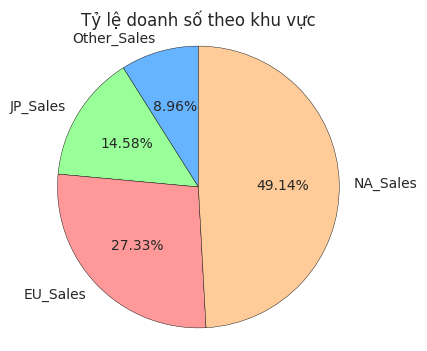

In [28]:
# Biểu đồ trực quan tỷ lệ đóng góp (thị phần) doanh số của từng khu vực

plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(region_sales_ratio,
                                   labels=region_sales_ratio.index,
                                   autopct='%.2f%%',
                                   startangle=90,
                                   colors=['#66b3ff','#99ff99','#ff9999','#ffcc99'],
                                   wedgeprops=dict(edgecolor='black'))
# Tiêu đề và hiển thị
plt.title('Tỷ lệ doanh số theo khu vực')
plt.axis('equal')
plt.show()

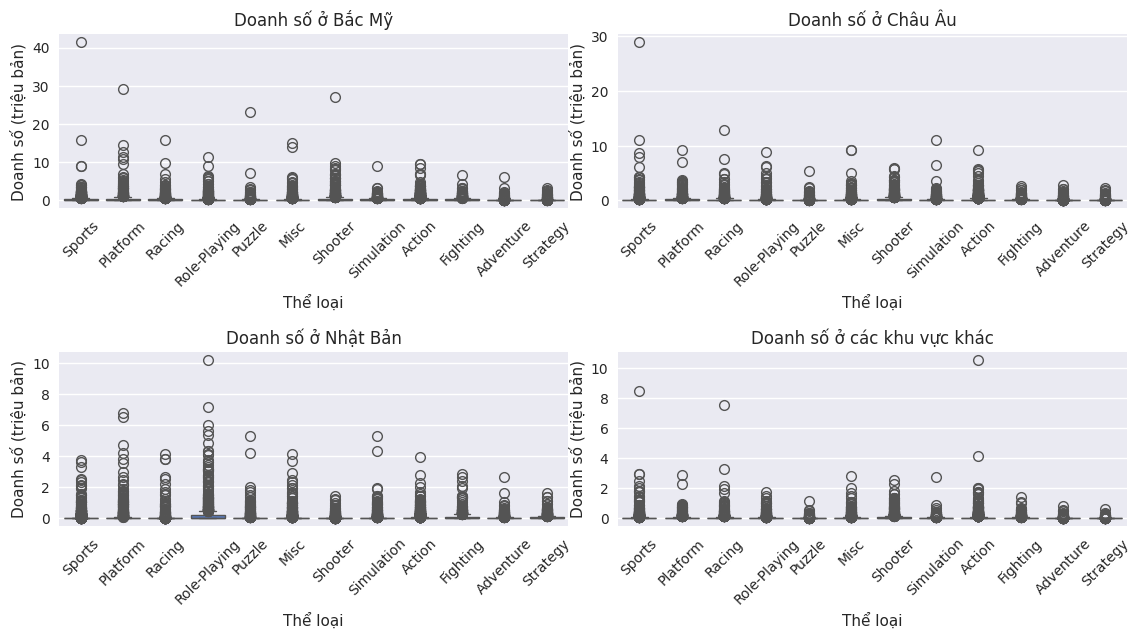

In [29]:
# so sánh doanh số theo khu vực

# Khu vực Bắc Mỹ
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Genre', y='NA_Sales', data=df)
plt.xlabel('Thể loại')
plt.ylabel('Doanh số (triệu bản)')
plt.title('Doanh số ở Bắc Mỹ')
plt.xticks(rotation=45)

# Khu vực Châu Âu
plt.tight_layout(pad=3.0)
plt.subplot(2, 2, 2)
sns.boxplot(df,x='Genre', y='EU_Sales')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số (triệu bản)')
plt.title('Doanh số ở Châu Âu')
plt.xticks(rotation=45)

# Khu vực Nhật Bản
plt.subplot(2, 2, 3)
sns.boxplot(df,x='Genre', y='JP_Sales')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số (triệu bản)')
plt.title('Doanh số ở Nhật Bản')
plt.xticks(rotation=45)

# Khu vực khác
plt.subplot(2, 2, 4)
sns.boxplot(df,x='Genre', y='Other_Sales')
plt.xlabel('Thể loại')
plt.ylabel('Doanh số (triệu bản)')
plt.title('Doanh số ở các khu vực khác')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Thể loại bán chạy nhất theo khu vực
genre_sales_by_region=df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()
genre_sales_by_region

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,861.77,516.48,158.65,184.92
1,Adventure,101.93,63.74,51.99,16.70
2,Fighting,220.74,100.00,87.15,36.19
3,Misc,396.92,211.77,106.67,73.92
4,Platform,445.99,200.65,130.65,51.51
5,Puzzle,122.01,50.52,56.68,12.47
6,Racing,356.93,236.31,56.61,76.68
7,Role-Playing,326.50,187.57,350.29,59.38
8,Shooter,575.16,310.45,38.18,101.90
9,Simulation,181.78,113.02,63.54,31.36


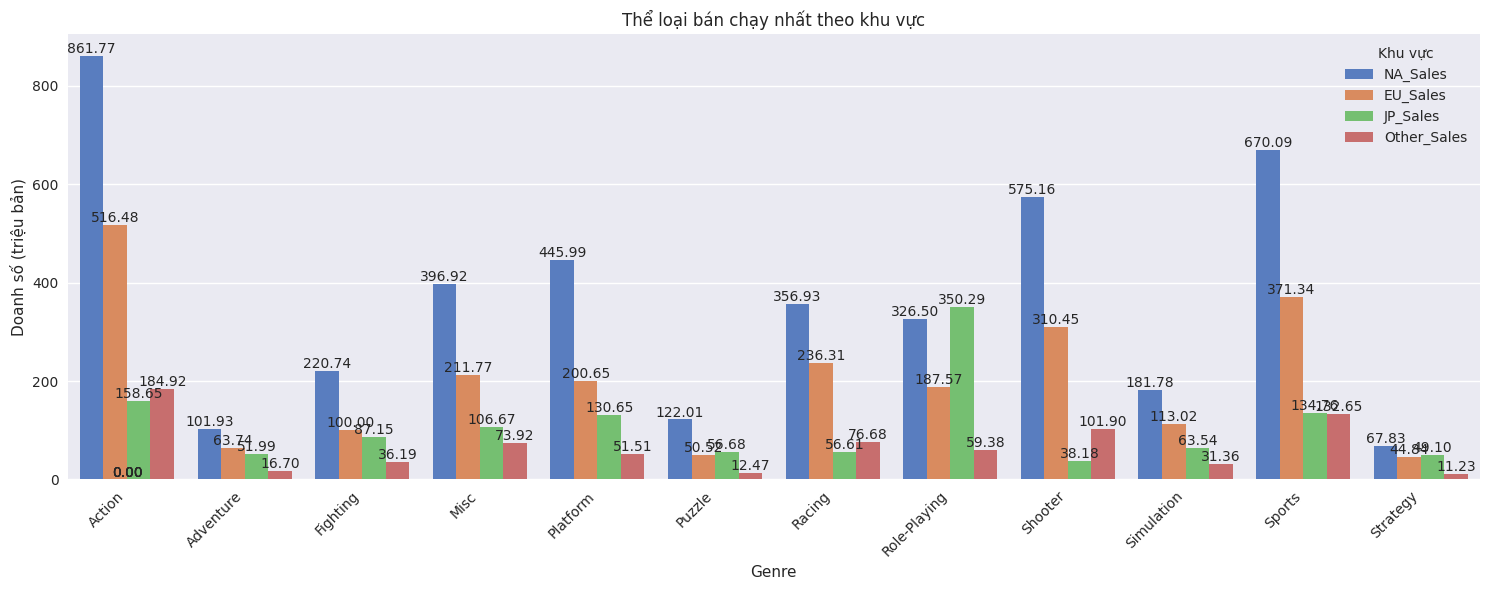

In [31]:
top_na_genre =(genre_sales_by_region[['Genre','NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(1))
top_eu_genre =genre_sales_by_region[['Genre','EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(1)
top_jp_genre=genre_sales_by_region[['Genre','JP_Sales']].sort_values(by='JP_Sales',ascending=False).head(1)
top_other_genre=genre_sales_by_region[['Genre','Other_Sales']].sort_values(by='Other_Sales',ascending=False).head(1)

melted_df=genre_sales_by_region.melt(id_vars="Genre",var_name='Region',value_name='sales')
plt.figure(figsize=(15,6))
ax=sns.barplot(x='Genre',y='sales',hue='Region',data=melted_df)

plt.ylabel('Doanh số (triệu bản)')
plt.title('Thể loại bán chạy nhất theo khu vực')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Khu vực')

# Thêm chú thích giá trị trên từng cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

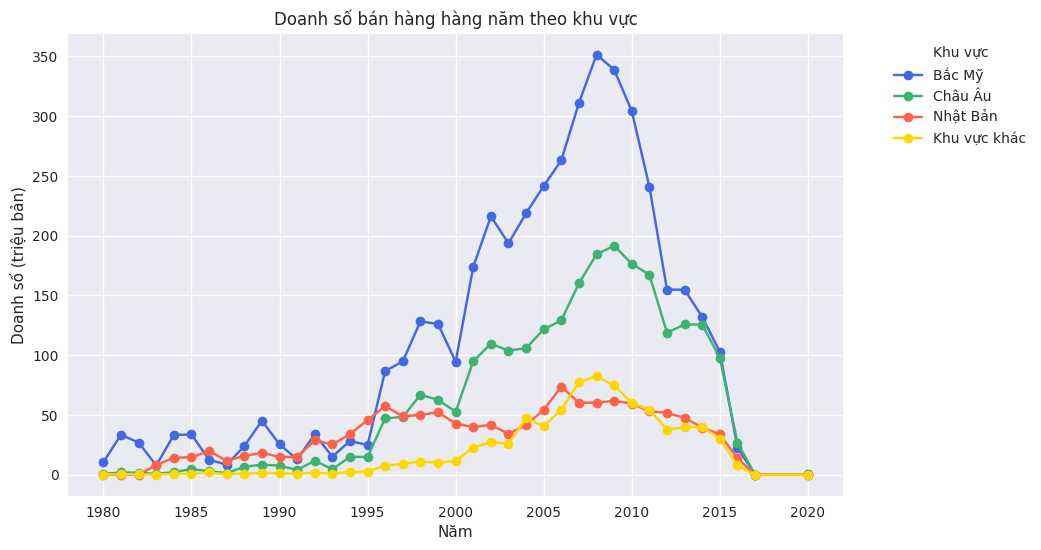

In [32]:
# Doanh số bán hàng hàng năm theo khu vực
yearly_sales_by_region = df.groupby('Year')[['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']].sum()

# Biểu đồ trực quan doanh số hàng năm theo khu vực
plt.figure(figsize=(10,6))
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['NA_Sales'],label='Bắc Mỹ', marker='o', color='royalblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['EU_Sales'],label='Châu Âu', marker='o', color='mediumseagreen')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['JP_Sales'],label='Nhật Bản', marker='o', color='tomato')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['Other_Sales'],label='Khu vực khác', marker='o', color='gold')
plt.xlabel('Năm')
plt.ylabel('Doanh số (triệu bản)')
plt.title('Doanh số bán hàng hàng năm theo khu vực')
plt.legend(title='Khu vực', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Huấn luyện mô hình

In [ ]:
#Dự đoán doanh thu với Random Forest Regressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Chuẩn bị dữ liệu cho mô hình
features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
target = 'Global_Sales'

X = df[features]
y = df[target]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42) #n_estimators: số lượng cây
model.fit(X_train, y_train)

# Dự đoán doanh thu trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.7557255382423653
R-squared: 0.8233447322789831


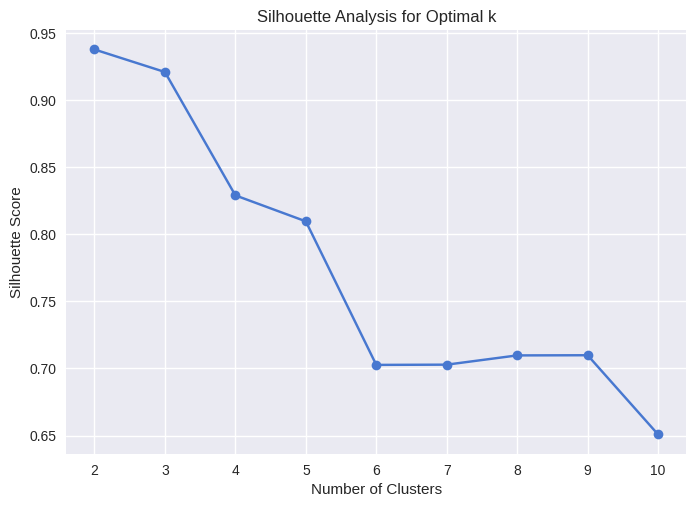

In [ ]:
# prompt: 2. Phân cụm thị trường với KMeans Clustering

import matplotlib.pyplot as plt
# This code performs KMeans clustering on the 'vgsales.csv' dataset.
# It focuses on clustering games based on sales data across different regions.

# ... (Previous code remains unchanged) ...

# Feature selection for clustering
features_for_clustering = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X_cluster = df[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.show()

# Choose the optimal number of clusters based on the plot (e.g., k = 3 from the example)
optimal_k = 3  # Change this value based on your plot

# Perform KMeans clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze and visualize clusters
# ... (Add code to analyze and visualize the clusters) ...
# For example, you might visualize the clusters in a 3D scatter plot
# or examine the characteristics of each cluster.

# Example visualization using plotly
fig = px.scatter_3d(df, x='NA_Sales', y='EU_Sales', z='JP_Sales', color='Cluster', title='Clusters of Video Games')
fig.show()


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Tạo cột kết hợp đặc trưng
df['combined_features'] = df['Genre'] + " " + df['Platform'] + " " + df['Publisher'] # Thay 'genre', 'platform', 'publisher' bằng 'Genre', 'Platform', 'Publisher'

# Tạo chỉ số để tra cứu theo tên game
indices = pd.Series(df.index, index=df['Name'].str.lower())


# Hàm gợi ý game tương tự
def recommend_similar_games_bert(game_title, top_n=5):
    game_title_lower = game_title.lower()
    if game_title_lower not in indices:
        print(f"Không tìm thấy game '{game_title}'. Vui lòng kiểm tra lại.")
        return

    idx = indices[game_title_lower]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Bỏ chính game đó

    print(f"\nCác game tương tự với '{df.loc[idx, 'Name']}':")

    for i, score in sim_scores:
        print(f"- {df.loc[i, 'Name']} (Thể loại: {df.loc[i, 'Genre']}, Nền tảng: {df.loc[i, 'Platform']}, Độ tương đồng: {score:.2f})")

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise.accuracy import rmse

# Giả định dữ liệu user-item (user_id, game_name, rating)
# Bạn cần thay bằng dữ liệu thực tế hoặc mô phỏng
data = {
    'user_id': [1, 1, 2, 2, 3, 3],
    'game_name': ['Wii Sports', 'Super Mario Bros.', 'Wii Sports', 'Tetris', 'Super Mario Bros.', 'Wii Sports'],
    'rating': [5, 4, 3, 5, 4, 2]
}
ratings_df = pd.DataFrame(data)

# Chuẩn bị dữ liệu cho Surprise
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(ratings_df[['user_id', 'game_name', 'rating']], reader)

# Chia dữ liệu
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVD
algo = SVD(random_state=42)
algo.fit(trainset)

# Đánh giá mô hình
predictions = algo.test(testset)
print(f"RMSE: {rmse(predictions):.2f}")

# Đánh giá bằng cross-validation
cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Hàm gợi ý cho một người dùng
def recommend_for_user(user_id, top_n=5):
    games = ratings_df['game_name'].unique()
    predictions = [algo.predict(user_id, game) for game in games]
    predictions.sort(key=lambda x: x.est, reverse=True)
    print(f"\nGợi ý cho user {user_id}:")
    for pred in predictions[:top_n]:
        print(f"- {pred.iid} (Dự đoán rating: {pred.est:.2f})")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [ ]:
# prompt: Hybrid Recommender với LightFM

import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k
import numpy as np

Sample user-item interactions (replace with your actual data)
interactions = df[['Name', 'Global_Sales']]  # Example: using game name and sales
interactions.rename(columns={'Name': 'item_id', 'Global_Sales': 'rating'}, inplace=True)
interactions['user_id'] = 1  # Assign all interactions to the same user (for demonstration purposes)

reate a sample dataset for demonstration (replace this with your actual data)
interactions = pd.DataFrame({
     'user_id': [1, 1, 2, 2, 3],
     'item_id': ['Game A', 'Game B', 'Game B', 'Game C', 'Game A'],
     'rating': [5, 4, 3, 5, 2]
 })

 Prepare data for LightFM
 dataset = Dataset()
 dataset.fit(interactions['user_id'].unique(), interactions['item_id'].unique())
 interactions_matrix, _ = dataset.build_interactions(zip(interactions['user_id'], interactions['item_id'], interactions['rating']))


def hybrid_recommender(game_title, user_id, df, sample_df, ratings_df, k=5):

    # Content-based filtering
    similar_games_content = content_based_filtering(game_title, sample_df, top_n=k)
    similar_game_ids_content = similar_games_content['Name'].tolist()


    # Collaborative filtering
    try:
      similar_game_ids_collaborative = collaborative_filtering_svd(ratings_df, user_id=user_id, n_recommendations=k)
    except KeyError:
      print("user_id not found")
      return similar_games_content
    except ValueError:
      print("not enough data for SVD")
      return similar_games_content

    # Combine recommendations (you can customize this)
    # Using a simple combination for demonstration
    recommendations = list(set(similar_game_ids_content + similar_game_ids_collaborative))[:k]
    recommendation_df = df[df["Name"].isin(recommendations)]

    return recommendation_df

# Example usage (replace with your actual data and parameters):
# recommendations = hybrid_recommender("Grand Theft Auto V", 1, df, sample_df, ratings_df, k=3)
# print(recommendations)


# Hệ thống gợi ý

## Đối với nhà phát hành

In [ ]:

df = df.dropna(subset=['Publisher', 'Genre', 'Platform', 'Global_Sales'])

# Chuẩn hóa
df['Genre'] = df['Genre'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Publisher'] = df['Publisher'].str.strip()
# Ánh xạ tên khu vực với cột trong dữ liệu
region_mapping = {
    'NA': 'NA_Sales',
    'EU': 'EU_Sales',
    'JP': 'JP_Sales',
    'OTHER': 'Other_Sales',
    'GLOBAL': 'Global_Sales'
}
# Hàm gợi ý dựa theo khu vực
def suggest_strategy_by_region(region_name, top_n=5):
    region = region_mapping.get(region_name.strip().upper())
    if not region:
        print(f"❌ Khu vực '{region_name}' không hợp lệ. Vui lòng chọn: NA, EU, JP, Other hoặc Global.")
        return
    print(f"\n🌍 Phân tích theo khu vực: {region_name.upper()} ({region})")
    # Tính tổng doanh thu theo thể loại
    genre_sales = df.groupby('Genre')[region].sum().sort_values(ascending=False)
    top_genre = genre_sales.idxmax()
    print(f"\n🔥 Thể loại phổ biến nhất: {top_genre}")
    # Trong thể loại này, tìm nền tảng có doanh thu cao nhất
    top_platform_data = df[df['Genre'] == top_genre].groupby('Platform')[region].sum()
    top_platform = top_platform_data.idxmax()
    print(f"🎮 Nền tảng bán chạy nhất cho thể loại này: {top_platform}")
    # Các nhà phát hành thành công với thể loại + nền tảng
    filtered = df[(df['Genre'] == top_genre) & (df['Platform'] == top_platform)]
    top_publishers = filtered.groupby('Publisher')[region].sum().sort_values(ascending=False).head(3)
    print("\n🏆 Một số nhà phát hành đã thành công:")
    for pub, sales in top_publishers.items():
        print(f"- {pub}: {sales:.2f} triệu bản")
    # Top 5 trò chơi nổi bật nhất trong nhóm này
    top_games = filtered.sort_values(by=region, ascending=False).head(top_n)
    print(f"\n⭐ Top {top_n} game nổi bật tại khu vực {region_name.upper()} (thể loại {top_genre}, nền tảng {top_platform}):\n")
    for i, row in top_games.iterrows():
        print(f"- {row['Name']} ({row['Publisher']}) — {row[region]:.2f} triệu bản")
# Gọi hàm
region_input = input("Nhập tên khu vực (NA, EU, JP, Other, Global): ")
suggest_strategy_by_region(region_input)

Nhập tên khu vực (NA, EU, JP, Other, Global): EU

🌍 Phân tích theo khu vực: EU (EU_Sales)

🔥 Thể loại phổ biến nhất: Action
🎮 Nền tảng bán chạy nhất cho thể loại này: PS3

🏆 Một số nhà phát hành đã thành công:
- Take-Two Interactive: 18.41 triệu bản
- Sony Computer Entertainment: 13.92 triệu bản
- Ubisoft: 13.75 triệu bản

⭐ Top 5 game nổi bật tại khu vực EU (thể loại Action, nền tảng PS3):

- Grand Theft Auto V (Take-Two Interactive) — 9.27 triệu bản
- FIFA Soccer 13 (Electronic Arts) — 5.05 triệu bản
- Grand Theft Auto IV (Take-Two Interactive) — 3.76 triệu bản
- Uncharted 3: Drake's Deception (Sony Computer Entertainment) — 2.80 triệu bản
- Red Dead Redemption (Take-Two Interactive) — 2.61 triệu bản


## Đối với người chơi

### Gợi ý theo thể loại và nền tảng chơi

In [ ]:
# Xử lý dữ liệu: loại bỏ dòng có giá trị thiếu
df = df.dropna(subset=['Genre', 'Platform', 'Global_Sales'])

# Chuyển tên cột thành chữ thường để dễ xử lý
df.columns = [col.lower() for col in df.columns]

# Hàm gợi ý game
def recommend_games(genre_input, platform_input, top_n=10):
    # Lọc theo thể loại và nền tảng
    filtered = df[(df['genre'].str.lower() == genre_input.lower()) &
                  (df['platform'].str.lower() == platform_input.lower())]

    # Sắp xếp theo doanh thu toàn cầu
    top_games = filtered.sort_values(by='global_sales', ascending=False).head(top_n)

    if top_games.empty:
        print("Không tìm thấy game nào phù hợp với lựa chọn của bạn.")
    else:
        print(f"\nTop {top_n} game thuộc thể loại '{genre_input}' trên nền tảng '{platform_input}':\n")
        for i, row in top_games.iterrows():
            print(f"- {row['name']} ({row['year']}) — Doanh thu: {row['global_sales']} triệu bản")

# Nhập thông tin từ người dùng
genre = input("Nhập thể loại game bạn quan tâm (ví dụ: Action, Sports, RPG): ")
platform = input("Nhập nền tảng bạn chơi (ví dụ: PS2, X360, PC, Wii): ")

recommend_games(genre, platform)


Nhập thể loại game bạn quan tâm (ví dụ: Action, Sports, RPG): action
Nhập nền tảng bạn chơi (ví dụ: PS2, X360, PC, Wii): ps2

Top 10 game thuộc thể loại 'action' trên nền tảng 'ps2':

- Grand Theft Auto: San Andreas (2004.0) — Doanh thu: 20.81 triệu bản
- Grand Theft Auto: Vice City (2002.0) — Doanh thu: 16.15 triệu bản
- Grand Theft Auto III (2001.0) — Doanh thu: 13.1 triệu bản
- Metal Gear Solid 2: Sons of Liberty (2001.0) — Doanh thu: 6.05 triệu bản
- The Lord of the Rings: The Two Towers (2002.0) — Doanh thu: 4.67 triệu bản
- Spider-Man: The Movie (2002.0) — Doanh thu: 4.48 triệu bản
- God of War (2005.0) — Doanh thu: 4.45 triệu bản
- Metal Gear Solid 3: Snake Eater (2004.0) — Doanh thu: 4.23 triệu bản
- God of War II (2007.0) — Doanh thu: 4.07 triệu bản
- Resident Evil 4 (2005.0) — Doanh thu: 3.62 triệu bản


### Gợi ý dựa trên trò chơi tương tự

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
!pip install rapidfuzz
from rapidfuzz import process  # Tương đương fuzzywuzzy nhưng nhanh hơn và hiện đại hơn
# Kết hợp các thông tin lại thành 1 chuỗi mô tả nội dung
df['combined_features'] = df['Genre'] + " " + df['Platform'] + " " + df['Publisher']
# Vector hóa chuỗi mô tả bằng TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])
# Tính độ tương đồng cosine
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Tạo một Series để tra cứu chỉ số theo tên game
indices = pd.Series(df.index, index=df['Name'].str.lower())
# Hàm gợi ý game tương tự
def recommend_similar_games(game_title, top_n=5):
    game_title_lower = game_title.lower()
    # Nếu tên game không khớp tuyệt đối
    if game_title_lower not in indices:
        print(f"⚠️ Không tìm thấy game có tên chính xác là '{game_title}'. Đang tìm tên gần đúng...")
        # Tìm tên gần đúng trong danh sách
        matches = process.extractOne(game_title_lower, indices.index, score_cutoff=70)
        if matches:
            game_title_lower = matches[0]
            print(f"✅ Có phải bạn đang tìm '{game_title_lower.title()}' không?")
        else:
            print("❌ Không tìm thấy tên game tương tự nào. Vui lòng kiểm tra lại chính tả.")
            return
    idx = indices[game_title_lower]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Bỏ chính nó

    print(f"\n🎮 Các game tương tự với '{df.loc[idx, 'Name']}' bạn có thể thích:\n")
    for i, score in sim_scores:
        print(f"- {df.loc[i, 'Name']} (Thể loại: {df.loc[i, 'Genre']}, Nền tảng: {df.loc[i, 'Platform']})")

# Nhập tên game từ người dùng
game_input = input("Nhập tên một game bạn yêu thích để gợi ý các game tương tự: ")
recommend_similar_games(game_input)


Nhập tên một game bạn yêu thích để gợi ý các game tương tự: soccer

🎮 Các game tương tự với 'Soccer' bạn có thể thích:

- Super Robot Spirits (Thể loại: Fighting, Nền tảng: N64)
- Roadsters (Thể loại: Racing, Nền tảng: PS)
- Gummy Bears Mini Golf (Thể loại: Sports, Nền tảng: DS)
- Mario Bros. (Thể loại: Platform, Nền tảng: 2600)
- Sega Rally Championship (Thể loại: Racing, Nền tảng: SAT)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
!pip install rapidfuzz
from rapidfuzz import process

# Giả sử df đã được load sẵn và có cột: 'Name', 'Genre', 'Platform', 'Publisher'
# Tạo cột mô tả nội dung kết hợp
df['combined_features'] = df['Genre'] + " " + df['Platform'] + " " + df['Publisher']
df['Name_lower'] = df['Name'].str.lower()  # Để tra cứu dễ hơn

# Tạo vector TF-IDF từ mô tả
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Tính cosine similarity giữa các game
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Tra cứu vị trí game theo tên
indices = pd.Series(df.index, index=df['Name_lower'])

# Hàm gợi ý trò chơi cùng thể loại
def recommend_same_genre_games(game_title, top_n=5):
    game_title_lower = game_title.lower()
    if game_title_lower not in indices:
        print(f"⚠️ Không tìm thấy game tên '{game_title}'. Đang tìm gần đúng...")
        match = process.extractOne(game_title_lower, indices.index, score_cutoff=70)
        if match:
            game_title_lower = match[0]
            print(f"✅ Có phải bạn đang tìm '{game_title_lower.title()}' không?")
        else:
            print("❌ Không tìm thấy tên game tương tự nào.")
            return

    idx = indices[game_title_lower]
    target_genre = df.loc[idx, 'Genre']

    # Lọc các game cùng thể loại (trừ chính nó)
    same_genre_indices = df[(df['Genre'] == target_genre) & (df.index != idx)].reset_index(drop=True)

    if same_genre_indices.empty:
        print(f"❌ Không có game nào cùng thể loại với '{game_title}' được tìm thấy.")
        return

    # Tính độ tương đồng chỉ trong nhóm cùng thể loại
    sim_scores = [(i, cosine_sim[idx][df.index[same_genre_indices.index[i]]]) for i in range(len(same_genre_indices))]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:top_n]

    print(f"\n🎯 Các game cùng thể loại '{target_genre}' giống '{df.loc[idx, 'Name']}' mà bạn có thể thích:\n")
    for i, score in sim_scores:
        print(f"- {df.loc[i, 'Name']} (Nền tảng: {df.loc[i, 'Platform']}, Nhà phát hành: {df.loc[i, 'Publisher']})")

# Dùng chương trình
game_input = input("Nhập tên game bạn yêu thích: ")
recommend_same_genre_games(game_input)


Nhập tên game bạn yêu thích: pikachu
⚠️ Không tìm thấy game tên 'pikachu'. Đang tìm gần đúng...
✅ Có phải bạn đang tìm 'Pokémon Yellow: Special Pikachu Edition' không?

🎯 Các game cùng thể loại 'Role-Playing' giống 'Pokémon Yellow: Special Pikachu Edition' mà bạn có thể thích:

- Pokemon Red/Pokemon Blue (Nền tảng: GB, Nhà phát hành: Nintendo)
- Pokemon Gold/Pokemon Silver (Nền tảng: GB, Nhà phát hành: Nintendo)
- Pokémon Yellow: Special Pikachu Edition (Nền tảng: GB, Nhà phát hành: Nintendo)
- Pokémon Crystal Version (Nền tảng: GB, Nhà phát hành: Nintendo)
- Flash Focus: Vision Training in Minutes a Day (Nền tảng: DS, Nhà phát hành: Nintendo)
